In [5]:
# Install required libraries
!pip install pandas openpyxl seaborn matplotlib

In [7]:
# Import libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Set plot style
sns.set(style="whitegrid")

# **Load and Clean E-commerce dataset**

In [14]:
# Load e-commerce dataset
ecommerce_df = pd.read_excel("C:/Users/kumar/Downloads/E-Commerce Sale Report Dumy.xlsx")

# Clean e-commerce data
ecommerce_df = ecommerce_df.dropna(subset=['Date', 'Year', 'Month', 'Brand', 'Item Name', 'Qty', 'NET Amount'])
ecommerce_df = ecommerce_df.rename(columns={
    'Qty': 'Quantity',
    'NET Amount': 'NetAmount',
    'Item Name': 'ItemName',
    'Channel Name': 'Channel',
    'CATEGORY': 'Department',
    'Product': 'Section'
})
ecommerce_df = ecommerce_df[['Year', 'Month', 'Brand', 'ItemName', 'Department', 'Section', 'Channel', 'Quantity', 'NetAmount', 'Type']]
ecommerce_df['Department'] = ecommerce_df['Department'].fillna('Unknown')
ecommerce_df['Section'] = ecommerce_df['Section'].fillna('Unknown')
ecommerce_df['Year'] = pd.to_numeric(ecommerce_df['Year'], errors='coerce').astype(int, errors='ignore')
ecommerce_df['Quantity'] = pd.to_numeric(ecommerce_df['Quantity'], errors='coerce').astype(float, errors='ignore')
ecommerce_df['NetAmount'] = pd.to_numeric(ecommerce_df['NetAmount'], errors='coerce').astype(float, errors='ignore')
ecommerce_df = ecommerce_df.dropna(subset=['Year', 'Quantity', 'NetAmount'])


# Print cleaned e-commerce DataFrame info
print("Cleaned E-Commerce DataFrame Shape:", ecommerce_df.shape)
print("Cleaned E-Commerce Columns:", ecommerce_df.columns.tolist())
print("E-Commerce Data Types:\n", ecommerce_df.dtypes)
print("Cleaned E-Commerce First Few Rows:\n", ecommerce_df.head())

Cleaned E-Commerce DataFrame Shape: (1587, 10)
Cleaned E-Commerce Columns: ['Year', 'Month', 'Brand', 'ItemName', 'Department', 'Section', 'Channel', 'Quantity', 'NetAmount', 'Type']
E-Commerce Data Types:
 Year            int32
Month          object
Brand          object
ItemName       object
Department     object
Section        object
Channel        object
Quantity      float64
NetAmount     float64
Type           object
dtype: object
Cleaned E-Commerce First Few Rows:
    Year Month            Brand                        ItemName  Department  \
0  2023   May  Roberto Cavalli        ARALDICO Hand Towel Grey  Bath Linen   
1  2023   May           Diesel  WASHED COLOR Guest Towel Black  Bath Linen   
2  2023   May           Diesel    NEW CRACKLE Bath Sheet Denim  Bath Linen   
3  2023   May     Halcyon Days               CHAPEL ROYAL Mug    Tableware   
4  2023   May     Halcyon Days               CHAPEL ROYAL Mug    Tableware   

       Section    Channel  Quantity  NetAmount  Type  

# **Load retail dataset**

In [24]:
# Load retail dataset
try:
    retail_df = pd.read_excel("C:/Users/kumar/Downloads/Retail Sale Report Dumy.xlsx")
except FileNotFoundError:
    print("Error: 'Retail Sale Report Dumy.xlsx' not found. Ensure the file is uploaded to Colab.")
    raise
except Exception as e:
    print("Error loading retail dataset:", str(e))
    raise

# Print initial retail DataFrame info
print("Retail DataFrame Shape:", retail_df.shape)
print("Retail Columns:", retail_df.columns.tolist())
print("Retail First Few Rows:\n", retail_df.head())

Retail DataFrame Shape: (2122, 32)
Retail Columns: ['Channel', 'Bill Date', 'Month', 'Year', 'Sales Person', 'Division', 'Section', 'Department', 'Item Code', 'Barcode', 'Brand', 'Product', 'Item Name', 'Dimension', 'Net Qty', 'Origin', 'Color', 'Qty', 'MRP', 'Gross Amount', 'Item Discount', 'Promotion Discount', 'Bill discount', 'Total Discount', 'Taxable Amount', 'CGST %', 'CGST Amount', 'SGST %', 'SGST Amount', 'IGST %', 'IGST Amount', 'NET Amount']
Retail First Few Rows:
                  Channel  Bill Date Month  Year     Sales Person  \
0  ELLE DECOR-SOUTH MALL 2022-12-16   Dec  2022  Harshita Pandey   
1  ELLE DECOR-SOUTH MALL 2022-12-16   Dec  2022      Abdul Ghani   
2  ELLE DECOR-SOUTH MALL 2022-12-16   Dec  2022      Abdul Ghani   
3  ELLE DECOR-SOUTH MALL 2022-12-16   Dec  2022      Abdul Ghani   
4  ELLE DECOR-SOUTH MALL 2022-12-16   Dec  2022      Akash Batra   

        Division     Section           Department Item Code        Barcode  \
0  Home & Living  Home Decor  Ca

# **Clean Retail Dataset**

In [26]:
# Clean retail data
retail_df = retail_df.dropna(subset=['Bill Date', 'Year', 'Month', 'Brand', 'Item Name', 'Qty', 'NET Amount'])
retail_df = retail_df.rename(columns={
    'Qty': 'Quantity',
    'NET Amount': 'NetAmount',
    'Item Name': 'ItemName',
    'Channel': 'Channel'
})
retail_df['Type'] = 'Sale'
retail_df = retail_df[['Year', 'Month', 'Brand', 'ItemName', 'Department', 'Section', 'Channel', 'Quantity', 'NetAmount', 'Type']]
retail_df['Department'] = retail_df['Department'].fillna('Unknown')
retail_df['Section'] = retail_df['Section'].fillna('Unknown')
retail_df['Year'] = pd.to_numeric(retail_df['Year'], errors='coerce').astype(int, errors='ignore')
retail_df['Quantity'] = pd.to_numeric(retail_df['Quantity'], errors='coerce').astype(float, errors='ignore')
retail_df['NetAmount'] = pd.to_numeric(retail_df['NetAmount'], errors='coerce').astype(float, errors='ignore')
retail_df = retail_df.dropna(subset=['Year', 'Quantity', 'NetAmount'])

# Print cleaned retail DataFrame info
print("Cleaned Retail DataFrame Shape:", retail_df.shape)
print("Cleaned Retail Columns:", retail_df.columns.tolist())
print("Retail Data Types:\n", retail_df.dtypes)
print("Cleaned Retail First Few Rows:\n", retail_df.head())

Cleaned Retail DataFrame Shape: (2117, 10)
Cleaned Retail Columns: ['Year', 'Month', 'Brand', 'ItemName', 'Department', 'Section', 'Channel', 'Quantity', 'NetAmount', 'Type']
Retail Data Types:
 Year            int32
Month          object
Brand          object
ItemName       object
Department     object
Section        object
Channel        object
Quantity      float64
NetAmount     float64
Type           object
dtype: object
Cleaned Retail First Few Rows:
    Year Month             Brand                                 ItemName  \
0  2022   Dec  Marie Antoinette                              Candle Jar    
1  2022   Dec  Marie Antoinette                              Candle Jar    
2  2022   Dec  Marie Antoinette                              Candle Jar    
3  2022   Dec  Marie Antoinette                              Candle Jar    
4  2022   Dec    Schott Zweisel  VIVID SENSES FORM 8890 Wine Glass Clear   

            Department     Section                Channel  Quantity  \
0  Candles 

# **Combine Dataset**

In [29]:
# Combine datasets
try:
    combined_df = pd.concat([ecommerce_df, retail_df], ignore_index=True)
except Exception as e:
    print("Error combining datasets:", str(e))
    print("E-Commerce DataFrame Head:\n", ecommerce_df.head())
    print("Retail DataFrame Head:\n", retail_df.head())
    print("E-Commerce Columns:", ecommerce_df.columns.tolist())
    print("Retail Columns:", retail_df.columns.tolist())
    print("E-Commerce Data Types:\n", ecommerce_df.dtypes)
    print("Retail Data Types:\n", retail_df.dtypes)
    raise

# Print combined DataFrame info
print("Combined DataFrame Shape:", combined_df.shape)
print("Combined Columns:", combined_df.columns.tolist())
print("Combined Data Types:\n", combined_df.dtypes)
print("Combined First Few Rows:\n", combined_df.head())

# Save combined data to CSV for reference
combined_df.to_csv('combined_sales.csv', index=False)

Combined DataFrame Shape: (3704, 10)
Combined Columns: ['Year', 'Month', 'Brand', 'ItemName', 'Department', 'Section', 'Channel', 'Quantity', 'NetAmount', 'Type']
Combined Data Types:
 Year            int32
Month          object
Brand          object
ItemName       object
Department     object
Section        object
Channel        object
Quantity      float64
NetAmount     float64
Type           object
dtype: object
Combined First Few Rows:
    Year Month            Brand                        ItemName  Department  \
0  2023   May  Roberto Cavalli        ARALDICO Hand Towel Grey  Bath Linen   
1  2023   May           Diesel  WASHED COLOR Guest Towel Black  Bath Linen   
2  2023   May           Diesel    NEW CRACKLE Bath Sheet Denim  Bath Linen   
3  2023   May     Halcyon Days               CHAPEL ROYAL Mug    Tableware   
4  2023   May     Halcyon Days               CHAPEL ROYAL Mug    Tableware   

       Section    Channel  Quantity  NetAmount  Type  
0   Hand Towel  TATA CLIQ      

# **Setup SQLite Database**

In [32]:
# Create an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Load combined data into SQLite
combined_df.to_sql('CombinedSales', conn, index=False, if_exists='replace')

# Test query to verify data
query = "SELECT COUNT(*) as row_count FROM CombinedSales"
test_df = pd.read_sql_query(query, conn)
print(test_df)

   row_count
0       3704


# **Year and Brand sales, Monthly**

Year and Brand Sales (Monthly):
   Year Month             Brand  TotalQuantity  TotalSales
0  2022   Dec    Schott Zweisel           10.0     46940.0
1  2022   Dec        Ritu Kumar           11.0     44938.0
2  2022   Dec  Marie Antoinette            8.0     19792.0
3  2022   Dec       Home Studio            1.0     16000.0
4  2022   Dec         Hugo Boss            1.0     11999.0


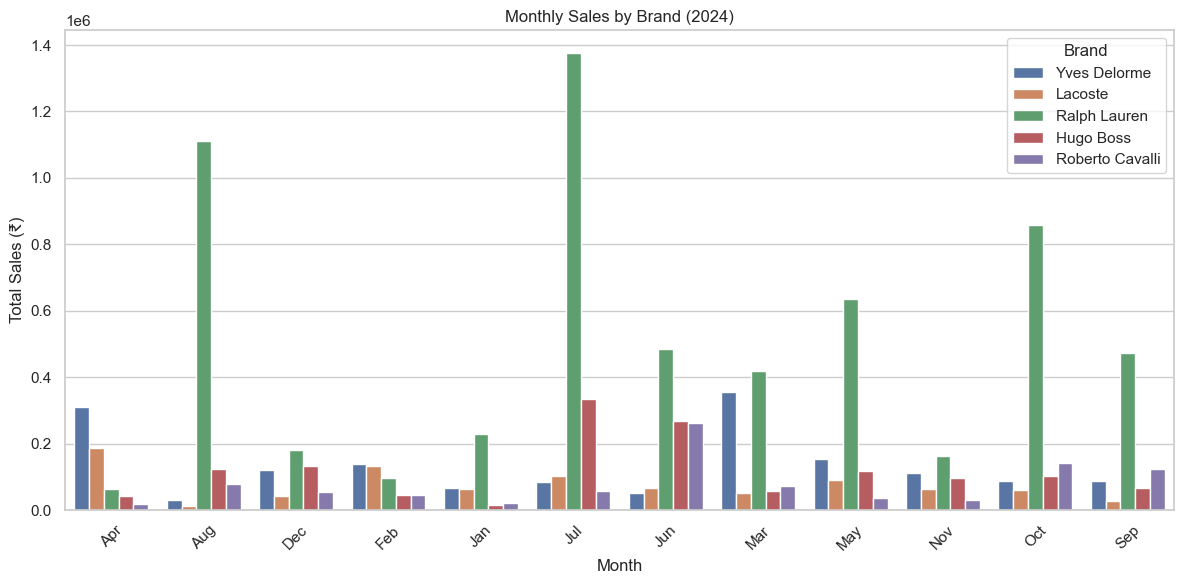

In [35]:
# SQL query for year and brand sales, monthly
query_brand_sales = """
SELECT Year, Month, Brand,
       SUM(Quantity) as TotalQuantity,
       SUM(NetAmount) as TotalSales
FROM CombinedSales
GROUP BY Year, Month, Brand
ORDER BY Year, Month, TotalSales DESC
"""

# Execute query
brand_sales_df = pd.read_sql_query(query_brand_sales, conn)

# Display top 5 rows
print("Year and Brand Sales (Monthly):")
print(brand_sales_df.head())

# Visualize: Bar chart for 2023 brand sales by month
brand_sales_2024 = brand_sales_df[brand_sales_df['Year'] == 2024]
top_brands = brand_sales_2024.groupby('Brand')['TotalSales'].sum().nlargest(5).index
plot_data = brand_sales_2024[brand_sales_2024['Brand'].isin(top_brands)]

plt.figure(figsize=(12, 6))
sns.barplot(data=plot_data, x='Month', y='TotalSales', hue='Brand')
plt.title('Monthly Sales by Brand (2024)')
plt.xlabel('Month')
plt.ylabel('Total Sales (₹)')
plt.legend(title='Brand')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Year/Item Name/Brand/Department/Section Sales (Monthly)**

Year/Item Name/Brand/Department/Section Sales (Monthly):
      Year Month                                    ItemName         Brand  \
2927  2025   Sep             POLOPLAY Wash Towel Office Blue  Ralph Lauren   
2928  2025   Sep                POLOPLAY Wash Towel Pink Sky  Ralph Lauren   
2929  2025   Sep               LAVANDE Kitchen Towel Printed        Coucke   
2930  2025   Sep  1CKE OLIVIER AMANDE CA Kitchen Towel Print        Coucke   
2931  2025   Sep                       FILLING Filler Commun  Yves Delorme   

                    Department        Section  TotalQuantity  TotalSales  
2927                     Towel     Bath Linen            1.0      909.35  
2928                     Towel     Bath Linen            1.0      909.35  
2929  Kitchen Towels & Napkins  Kitchen Linen            1.0      719.20  
2930  Kitchen Towels & Napkins  Kitchen Linen            1.0      719.20  
2931    Pillow & Pillow Covers      Bed Linen            2.0        0.00  


C:\Users\kumar\AppData\Local\Temp\ipykernel_33272\1491651370.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['ItemBrand'] = plot_data['ItemName'] + ' (' + plot_data['Brand'] + ')'


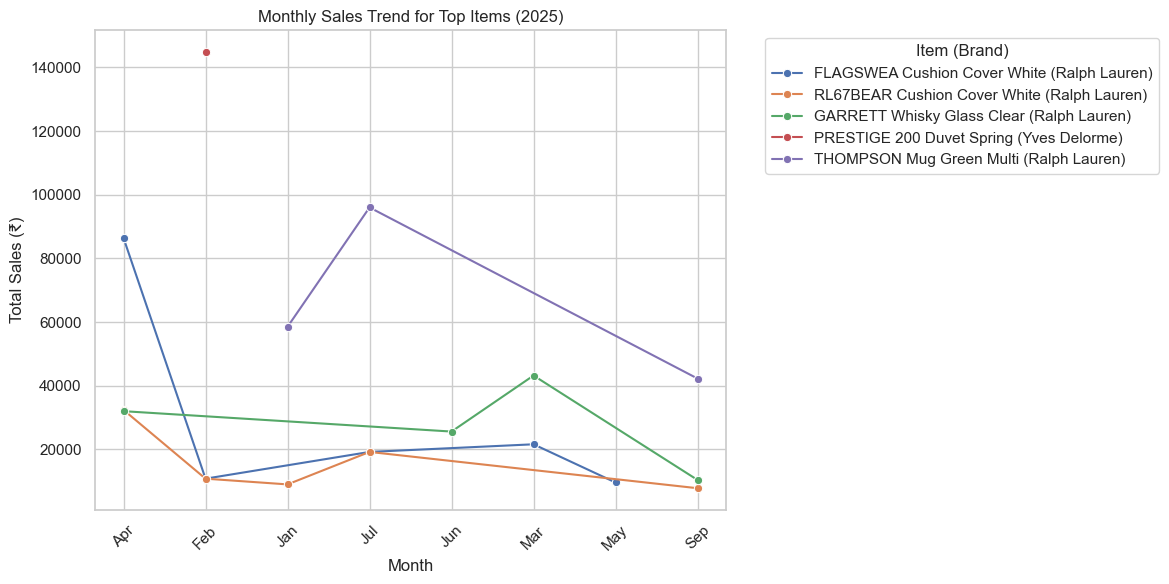

In [38]:
# SQL query for detailed sales breakdown
query_item_sales = """
SELECT Year, Month, ItemName, Brand, Department, Section,
       SUM(Quantity) as TotalQuantity,
       SUM(NetAmount) as TotalSales
FROM CombinedSales
GROUP BY Year, Month, ItemName, Brand, Department, Section
ORDER BY Year, Month, TotalSales DESC
"""

# Execute query
item_sales_df = pd.read_sql_query(query_item_sales, conn)

# Display top 5 rows
print("Year/Item Name/Brand/Department/Section Sales (Monthly):")
print(item_sales_df.tail())

# Visualize: Line chart for top item sales in 2023
item_sales_2025 = item_sales_df[item_sales_df['Year'] == 2025]
top_items = item_sales_2025.groupby(['ItemName', 'Brand'])['TotalSales'].sum().nlargest(5).index
plot_data = item_sales_2025[item_sales_2025.apply(lambda x: (x['ItemName'], x['Brand']) in top_items, axis=1)]
plot_data['ItemBrand'] = plot_data['ItemName'] + ' (' + plot_data['Brand'] + ')'

plt.figure(figsize=(12, 6))
sns.lineplot(data=plot_data, x='Month', y='TotalSales', hue='ItemBrand', marker='o')
plt.title('Monthly Sales Trend for Top Items (2025)')
plt.xlabel('Month')
plt.ylabel('Total Sales (₹)')
plt.legend(title='Item (Brand)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Top ordering channels**

Top Ordering Channels (Yearly and Monthly):
    Year Month                Channel  TotalQuantity  TotalSales
73  2025   Mar              TATA CLIQ           19.0    175291.0
74  2025   Mar             ELLE DECOR           26.0    101775.0
75  2025   May  ELLE DECOR-SOUTH MALL           57.0    182581.6
76  2025   Oct  ELLE DECOR-SOUTH MALL           10.0     65500.0
77  2025   Sep  ELLE DECOR-SOUTH MALL          282.0   1852988.3


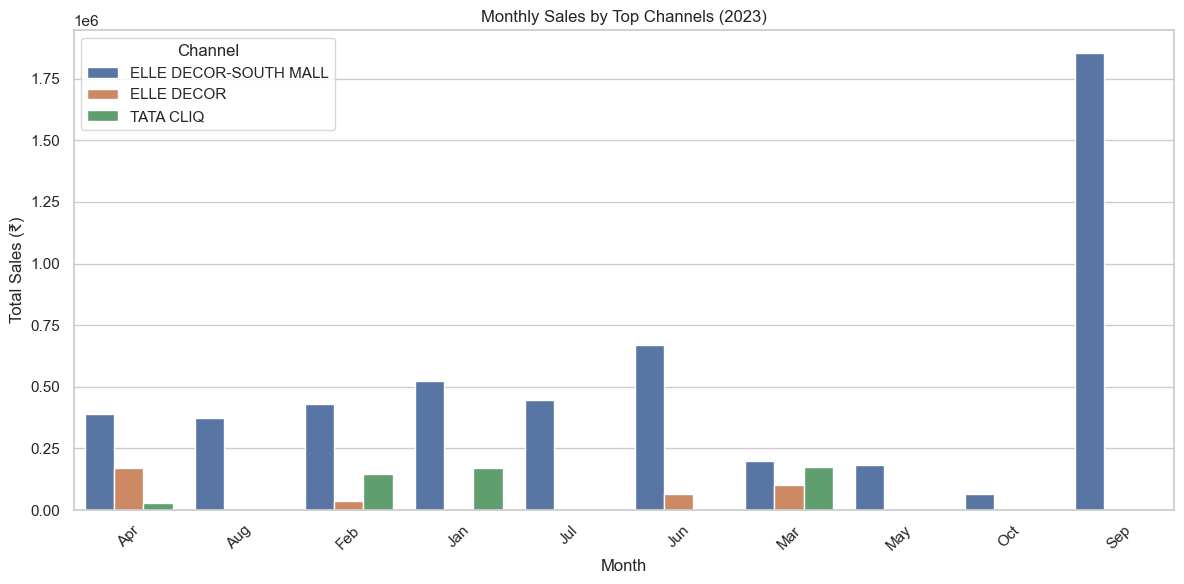

In [41]:
# SQL query for top ordering channels
query_channel_sales = """
SELECT Year, Month, Channel,
       SUM(Quantity) as TotalQuantity,
       SUM(NetAmount) as TotalSales
FROM CombinedSales
GROUP BY Year, Month, Channel
ORDER BY Year, Month, TotalSales DESC
"""

# Execute query
channel_sales_df = pd.read_sql_query(query_channel_sales, conn)

# Display top 5 rows
print("Top Ordering Channels (Yearly and Monthly):")
print(channel_sales_df.tail())

# Visualize: Bar chart for top channels in 2023
channel_sales_2025 = channel_sales_df[channel_sales_df['Year'] == 2025]
top_channels = channel_sales_2025.groupby('Channel')['TotalSales'].sum().nlargest(3).index
plot_data = channel_sales_2025[channel_sales_2025['Channel'].isin(top_channels)]

plt.figure(figsize=(12, 6))
sns.barplot(data=plot_data, x='Month', y='TotalSales', hue='Channel')
plt.title('Monthly Sales by Top Channels (2023)')
plt.xlabel('Month')
plt.ylabel('Total Sales (₹)')
plt.legend(title='Channel')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Department sales**

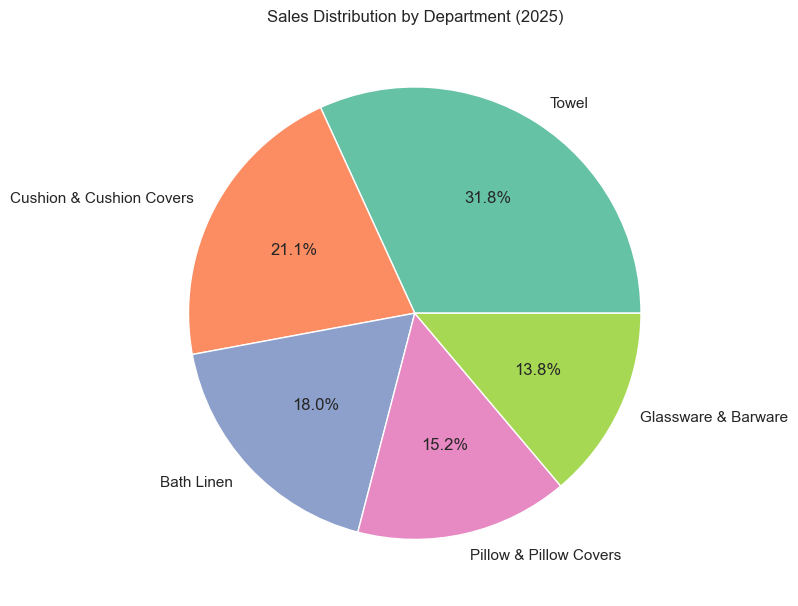

In [44]:
# SQL query for department sales
query_dept_sales = """
SELECT Year, Department,
       SUM(NetAmount) as TotalSales
FROM CombinedSales
WHERE Department IS NOT NULL
GROUP BY Year, Department
ORDER BY Year, TotalSales DESC
"""

# Execute query
dept_sales_df = pd.read_sql_query(query_dept_sales, conn)

# Visualize: Pie chart for department sales in 2025
dept_sales_2025 = dept_sales_df[dept_sales_df['Year'] == 2025]
top_depts = dept_sales_2025.nlargest(5, 'TotalSales')

plt.figure(figsize=(8, 8))
plt.pie(top_depts['TotalSales'], labels=top_depts['Department'], autopct='%1.1f%%', colors=sns.color_palette('Set2', 5))
plt.title('Sales Distribution by Department (2025)')
plt.tight_layout()
plt.show()

# **Hidden Patterns and Trends (Return Analysis)**

# **Analyze returns to find high-return items**

In [48]:
# Analyze returns to find high-return items
returns_df = combined_df[combined_df['Type'] == 'Return']
return_by_item = returns_df.groupby(['ItemName', 'Brand'])['Quantity'].sum().abs().reset_index(name='TotalReturns')
sales_df = combined_df[combined_df['Type'] == 'Sale']
sales_by_item = sales_df.groupby(['ItemName', 'Brand'])['Quantity'].sum().reset_index(name='TotalSales')
return_analysis = pd.merge(return_by_item, sales_by_item, on=['ItemName', 'Brand'], how='left')
return_analysis['ReturnRate'] = return_analysis['TotalReturns'] / return_analysis['TotalSales']
return_analysis = return_analysis[return_analysis['TotalSales'] > 0]
high_return_item = return_analysis.loc[return_analysis['ReturnRate'].idxmax()]

print("High Return Item Analysis:")
print(high_return_item)

# Seasonal trend analysis: Monthly sales for 2023
monthly_sales_2025 = brand_sales_df[brand_sales_df['Year'] == 2025].groupby('Month')['TotalSales'].sum().reset_index()
peak_month = monthly_sales_2025.loc[monthly_sales_2025['TotalSales'].idxmax()]

print("\nPeak Sales Month in 2025:")
print(peak_month)

High Return Item Analysis:
ItemName         SOFT LINE  Fitted Bed Sheet Terracotta
Brand                                             Essix
TotalReturns                                        1.0
TotalSales                                          1.0
ReturnRate                                          1.0
Name: 3, dtype: object

Peak Sales Month in 2025:
Month               Sep
TotalSales    1852988.3
Name: 9, dtype: object


# **Sales Increase Strategies**

# **Analyze top-performing brands and channels**

In [60]:
# Analyze top-performing brands and channels
top_brands = brand_sales_df.groupby('Brand')['TotalSales'].sum().nlargest(5)
top_channels = channel_sales_df.groupby('Channel')['TotalSales'].sum().nlargest(3)

print("Top 5 Brands by Total Sales:")
print(top_brands)
print("\nTop 3 Channels by Total Sales:")
print(top_channels)

print("\nSales Increase Strategies:")
print("1. Promote High-Performing Brands: Focus marketing efforts on top brands like", top_brands.index[0], "and", top_brands.index[1], "through targeted campaigns.")
print("2. Optimize Channel Performance: Strengthen presence on", top_channels.index[0], "by improving user experience and promotions.")
print("3. Address High Returns: For", high_return_item['ItemName'], "by", high_return_item['Brand'], "(return rate:", f"{high_return_item['ReturnRate']:.2%}), investigate quality issues or improve product descriptions.")
print("4. Capitalize on Seasonal Peaks: Increase inventory and promotions in", peak_month['Month'], "to leverage high demand.")

Top 5 Brands by Total Sales:
Brand
Ralph Lauren       10962729.68
Yves Delorme        2527319.73
Hugo Boss           2301152.44
Lacoste             1911201.54
Roberto Cavalli     1475004.95
Name: TotalSales, dtype: float64

Top 3 Channels by Total Sales:
Channel
ELLE DECOR-SOUTH MALL    17837105.42
TATA CLIQ                 5272294.95
ELLE DECOR                2283032.23
Name: TotalSales, dtype: float64

Sales Increase Strategies:
1. Promote High-Performing Brands: Focus marketing efforts on top brands like Ralph Lauren and Yves Delorme through targeted campaigns.
2. Optimize Channel Performance: Strengthen presence on ELLE DECOR-SOUTH MALL by improving user experience and promotions.
3. Address High Returns: For  SOFT LINE  Fitted Bed Sheet Terracotta by Essix (return rate: 100.00%), investigate quality issues or improve product descriptions.
4. Capitalize on Seasonal Peaks: Increase inventory and promotions in Sep to leverage high demand.
